In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
from methods.divide_dataframe import divide_dataframe
from models_raw.classic_models.logistic_regression.logistic_regression_fit import log_regression_fit
from models_raw.classic_models.logistic_regression.logistic_regression_predict import log_regression_predict_with_target, log_regression_predict_without_target

(CVXPY) Dec 11 06:50:46 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Dec 11 06:50:46 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# {k:np.sum if k in {'col3','col4'} else k:np.average for k in df.columns if k not in {'col1','col2'}

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
large_credit_takers = [
    53123153,
    52175920,	
    53031443,	
    52423025,	
    51787828,
]

In [7]:
# dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
df_bki = pd.read_csv('data/df_BKI_30k.csv', index_col=False, low_memory=False)

In [8]:
df_no_target = pd.read_csv('data/df_test_notarget_10k.csv', index_col=False, low_memory=False)

In [9]:
df_bki.shape

(481335, 92)

In [10]:
df_no_target.shape

(159393, 92)

In [11]:
df_target = pd.read_csv('data/df_target_30k.csv', index_col=False, low_memory=False)

In [12]:
final_df = divide_dataframe(df_bki, df_target)

d:\PYTHON_PROJECTS\MIPT-hackathon-Robofinance\working_with_datasets\methods\cols_to_datetime.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dates[cols_for_datetime_format] = df_dates[cols_for_datetime_format].apply(pd.to_datetime)
d:\PYTHON_PROJECTS\MIPT-hackathon-Robofinance\working_with_datasets\methods\cols_to_datetime.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dates['credit_duration'] = (df_dates['trade_close_dt'] - df_dates['trade_opened_dt']).dt.days
d:\PYTHON_PROJECTS\MIPT-hack

In [13]:
final_df_no_target = divide_dataframe(df_no_target)

d:\PYTHON_PROJECTS\MIPT-hackathon-Robofinance\working_with_datasets\methods\cols_to_datetime.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dates[cols_for_datetime_format] = df_dates[cols_for_datetime_format].apply(pd.to_datetime)
d:\PYTHON_PROJECTS\MIPT-hackathon-Robofinance\working_with_datasets\methods\cols_to_datetime.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dates['credit_duration'] = (df_dates['trade_close_dt'] - df_dates['trade_opened_dt']).dt.days
d:\PYTHON_PROJECTS\MIPT-hack

In [14]:
for col in [x for x in final_df.columns if x != 'target']:
    if col not in final_df_no_target.columns:
        final_df.drop(columns=[col], inplace=True)

In [15]:
del df_bki

In [16]:
logerg_pickle_file_path = 'models_saved/classic_models/logistic_regression/'
logerg_model_result_file_path = 'model_results/classic_models/logistic_regression/'

------------------------
Variable name: account_amt_credit_limit_sum
------------------------
                            Bin  Count  Count (%)  Non-event  Event  \
0              (-inf, 53436.05)   4798   0.228509       3420   1378   
1         [53436.05, 159866.42)   4083   0.194456       3105    978   
2        [159866.42, 533827.88)   5321   0.253417       4294   1027   
3       [533827.88, 2875933.00)   5649   0.269038       4743    906   
4             [2875933.00, inf)   1146   0.054579       1005    141   
5                       Special      0   0.000000          0      0   
6                       Missing      0   0.000000          0      0   
Totals                           20997   1.000000      16567   4430   

        Event rate       WoE        IV        JS  
0         0.287203 -0.410006  0.042897  0.005325  
1         0.239530 -0.163754  0.005461  0.000682  
2         0.193009  0.111564  0.003053  0.000381  
3         0.160382  0.336373  0.027508  0.003422  
4         0

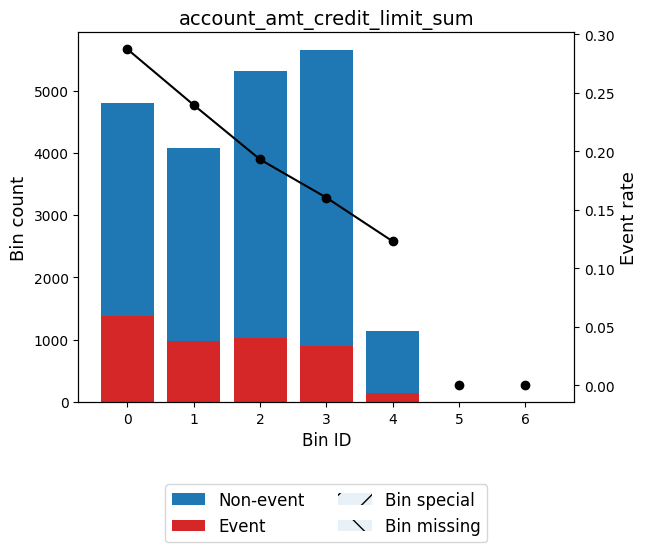

------------------------
Variable name: due_arrear_principal_outstanding_sum
------------------------
                          Bin  Count  Count (%)  Non-event  Event  Event rate  \
0             (-inf, 4908.99)   3229   0.153784       2377    852    0.263859   
1         [4908.99, 39334.79)   5403   0.257322       3999   1404    0.259856   
2        [39334.79, 70177.86)   2064   0.098300       1606    458    0.221899   
3       [70177.86, 319854.72)   5325   0.253608       4309   1016    0.190798   
4            [319854.72, inf)   4976   0.236986       4276    700    0.140675   
5                     Special      0   0.000000          0      0    0.000000   
6                     Missing      0   0.000000          0      0    0.000000   
Totals                         20997   1.000000      16567   4430    0.210983   

             WoE        IV        JS  
0      -0.293005  0.014312  0.001783  
1      -0.272294  0.020571  0.002563  
2       -0.06438  0.000415  0.000052  
3       0.12

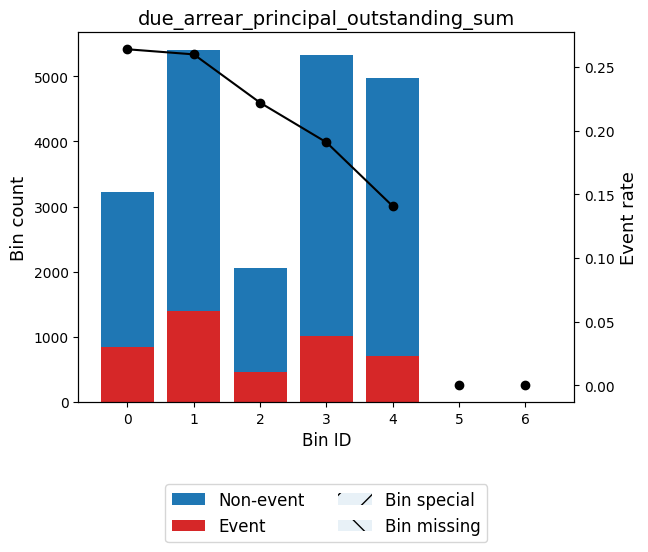

------------------------
Variable name: due_arrear_amt_outstanding_sum
------------------------
                          Bin  Count  Count (%)  Non-event  Event  Event rate  \
0             (-inf, 4200.74)   2764   0.131638       2033    731    0.264472   
1         [4200.74, 39884.29)   5630   0.268134       4163   1467    0.260568   
2        [39884.29, 69280.62)   1981   0.094347       1534    447    0.225644   
3       [69280.62, 322703.38)   5540   0.263847       4472   1068    0.192780   
4            [322703.38, inf)   5082   0.242035       4365    717    0.141086   
5                     Special      0   0.000000          0      0    0.000000   
6                     Missing      0   0.000000          0      0    0.000000   
Totals                         20997   1.000000      16567   4430    0.210983   

             WoE        IV        JS  
0      -0.296159  0.012527  0.001560  
1      -0.275997  0.022043  0.002747  
2      -0.085938  0.000714  0.000089  
3       0.113035  

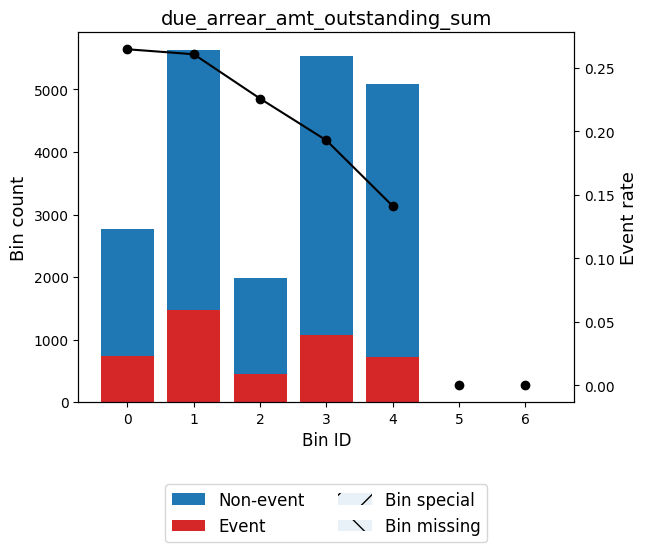

------------------------
Variable name: arrear_start_amt_outstanding_sum
------------------------
                            Bin  Count  Count (%)  Non-event  Event  \
0              (-inf, 51561.35)   5655   0.269324       4097   1558   
1         [51561.35, 155898.71)   3919   0.186646       3006    913   
2        [155898.71, 629653.34)   5783   0.275420       4684   1099   
3       [629653.34, 2853105.88)   4546   0.216507       3819    727   
4             [2853105.88, inf)   1094   0.052103        961    133   
5                       Special      0   0.000000          0      0   
6                       Missing      0   0.000000          0      0   
Totals                           20997   1.000000      16567   4430   

        Event rate       WoE        IV        JS  
0         0.275508 -0.352161  0.036764  0.004572  
1         0.232968 -0.127383  0.003140  0.000392  
2         0.190040  0.130739  0.004530  0.000566  
3         0.159921  0.339804  0.022566  0.002807  
4      

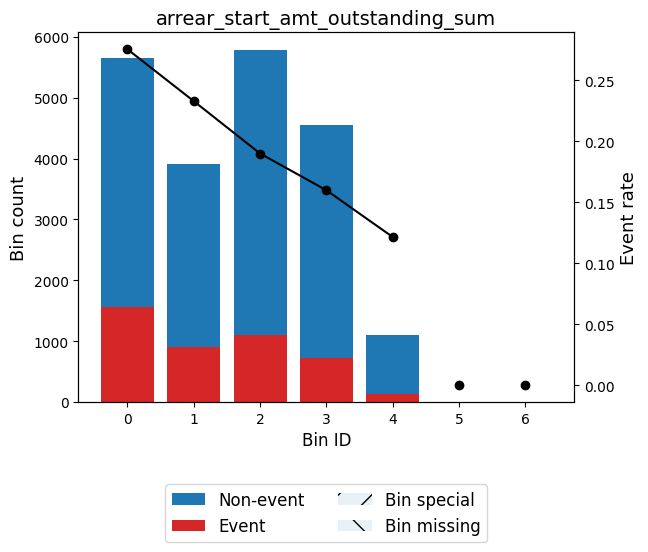

------------------------
Variable name: trade_loan_kind_code_1.0
------------------------
                 Bin  Count  Count (%)  Non-event  Event  Event rate  \
0       (-inf, 0.50)   7143   0.340191       5319   1824    0.255355   
1       [0.50, 1.50)   3517   0.167500       2685    832    0.236565   
2       [1.50, 3.50)   4033   0.192075       3200    833    0.206546   
3       [3.50, 5.50)   2263   0.107777       1878    385    0.170128   
4       [5.50, 9.50)   2176   0.103634       1843    333    0.153033   
5        [9.50, inf)   1865   0.088822       1642    223    0.119571   
6            Special      0   0.000000          0      0    0.000000   
7            Missing      0   0.000000          0      0    0.000000   
Totals                20997   1.000000      16567   4430    0.210983   

             WoE        IV        JS  
0       -0.24876  0.022557  0.002812  
1       -0.14741  0.003795  0.000474  
2       0.026859  0.000137  0.000017  
3       0.265706  0.007028  0.000

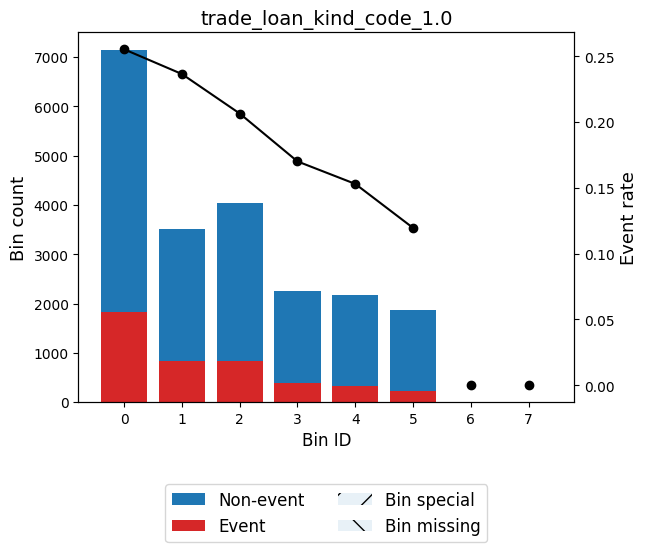

------------------------
Variable name: due_arrear_principal_outstanding_max
------------------------
                         Bin  Count  Count (%)  Non-event  Event  Event rate  \
0             (-inf, 887.26)   2169   0.103300       1635    534    0.246196   
1          [887.26, 5461.12)   1626   0.077440       1144    482    0.296433   
2        [5461.12, 16244.21)   3923   0.186836       2928    995    0.253632   
3       [16244.21, 49514.61)   3902   0.185836       3009    893    0.228857   
4            [49514.61, inf)   9377   0.446588       7851   1526    0.162739   
5                    Special      0   0.000000          0      0    0.000000   
6                    Missing      0   0.000000          0      0    0.000000   
Totals                        20997   1.000000      16567   4430    0.210983   

             WoE        IV        JS  
0      -0.200011  0.004371  0.000545  
1      -0.454671  0.018073  0.002240  
2      -0.239681  0.011473  0.001431  
3      -0.104237  0.0

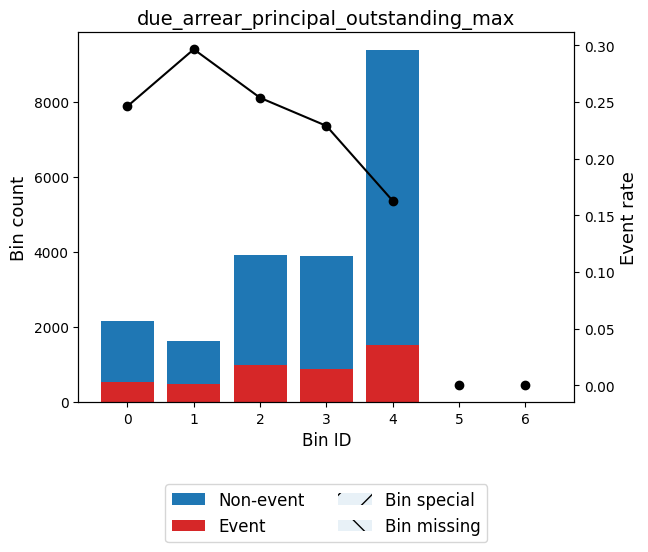

------------------------
Variable name: due_arrear_amt_outstanding_max
------------------------
                          Bin  Count  Count (%)  Non-event  Event  Event rate  \
0             (-inf, 4029.17)   2865   0.136448       2104    761    0.265620   
1         [4029.17, 18000.30)   4774   0.227366       3546   1228    0.257227   
2        [18000.30, 49345.50)   3692   0.175835       2841    851    0.230498   
3       [49345.50, 188607.36)   5204   0.247845       4277    927    0.178132   
4            [188607.36, inf)   4462   0.212507       3799    663    0.148588   
5                     Special      0   0.000000          0      0    0.000000   
6                     Missing      0   0.000000          0      0    0.000000   
Totals                         20997   1.000000      16567   4430    0.210983   

             WoE        IV        JS  
0      -0.302051  0.013527  0.001684  
1       -0.25858  0.016332  0.002036  
2      -0.113514  0.002340  0.000292  
3        0.21004  

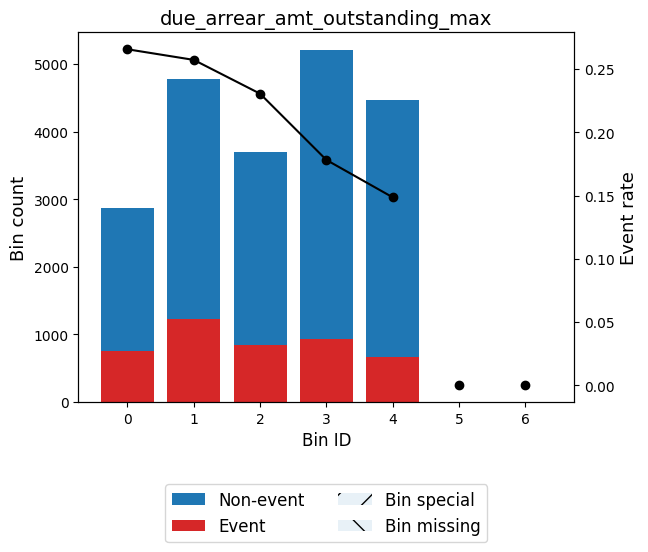

------------------------
Variable name: account_amt_credit_limit_1.0
------------------------
                           Bin  Count  Count (%)  Non-event  Event  \
0             (-inf, 30784.53)   9239   0.440015       6885   2354   
1         [30784.53, 70187.50)   1901   0.090537       1467    434   
2        [70187.50, 159899.50)   2148   0.102300       1720    428   
3       [159899.50, 355319.30)   2335   0.111206       1921    414   
4       [355319.30, 531399.34)   1279   0.060913       1070    209   
5             [531399.34, inf)   4095   0.195028       3504    591   
6                      Special      0   0.000000          0      0   
7                      Missing      0   0.000000          0      0   
Totals                          20997   1.000000      16567   4430   

        Event rate       WoE        IV        JS  
0         0.254789 -0.245784  0.028460  0.003549  
1         0.228301 -0.101083  0.000952  0.000119  
2         0.199255  0.071943  0.000518  0.000065  
3

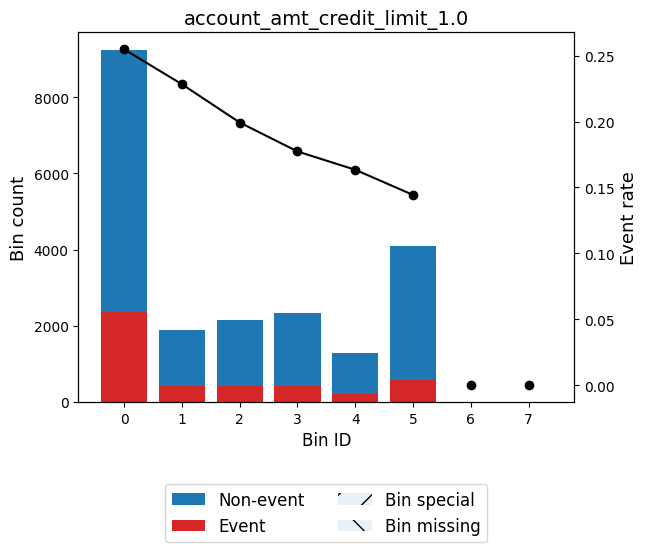

------------------------
Variable name: account_amt_credit_limit_max
------------------------
                          Bin  Count  Count (%)  Non-event  Event  Event rate  \
0             (-inf, 5445.00)   1159   0.055198        807    352    0.303710   
1         [5445.00, 20025.75)   3863   0.183979       2831   1032    0.267150   
2        [20025.75, 50842.50)   3875   0.184550       2949    926    0.238968   
3       [50842.50, 200007.20)   6150   0.292899       4985   1165    0.189431   
4            [200007.20, inf)   5950   0.283374       4995    955    0.160504   
5                     Special      0   0.000000          0      0    0.000000   
6                     Missing      0   0.000000          0      0    0.000000   
Totals                         20997   1.000000      16567   4430    0.210983   

             WoE        IV        JS  
0      -0.489321  0.015045  0.001862  
1      -0.309882  0.019236  0.002395  
2      -0.160666  0.004985  0.000622  
3       0.134699  0.

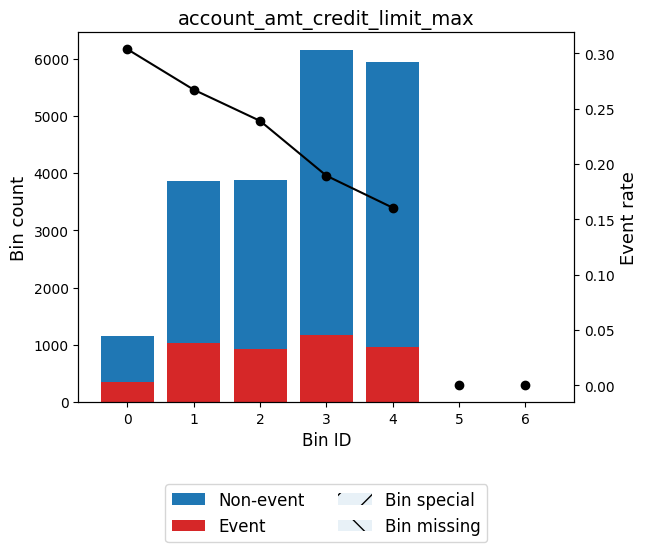

------------------------
Variable name: past_due_int_amt_past_due_mean
------------------------
                     Bin  Count  Count (%)  Non-event  Event  Event rate  \
0          (-inf, 18.69)  15560   0.741058      12682   2878    0.184961   
1        [18.69, 334.67)   1580   0.075249       1207    373    0.236076   
2       [334.67, 950.38)   1398   0.066581        974    424    0.303290   
3          [950.38, inf)   2459   0.117112       1704    755    0.307035   
4                Special      0   0.000000          0      0    0.000000   
5                Missing      0   0.000000          0      0    0.000000   
Totals                    20997   1.000000      16567   4430    0.210983   

             WoE        IV        JS  
0       0.164075  0.019006  0.002373  
1      -0.144698  0.001641  0.000205  
2      -0.487335  0.017992  0.002227  
3      -0.504997  0.034125  0.004221  
4            0.0  0.000000  0.000000  
5            0.0  0.000000  0.000000  
Totals            0.07

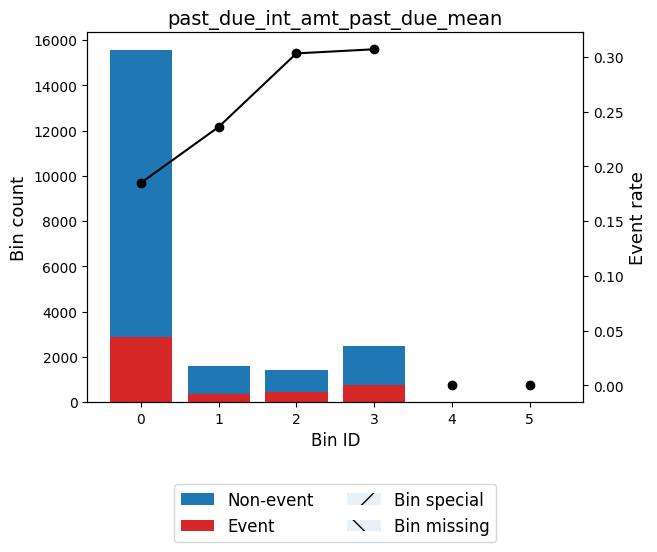

In [17]:
cols_to_drop, model_summary = log_regression_fit(final_df, logerg_pickle_file_path)

In [18]:
logreg_predict = log_regression_predict_with_target(final_df, cols_to_drop, logerg_pickle_file_path, logerg_model_result_file_path)

LogRegression test score: 0.7817777777777778
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      7036
           1       0.50      0.03      0.06      1964

    accuracy                           0.78      9000
   macro avg       0.64      0.51      0.47      9000
weighted avg       0.72      0.78      0.70      9000



In [19]:
model_summary.head(10)

,name,dtype,status,selected,n_bins,iv,js,gini,quality_score
10,account_amt_credit_limit_sum,numerical,OPTIMAL,True,5,0.097516,0.012096,0.173169,0.353728
51,due_arrear_principal_outstanding_sum,numerical,OPTIMAL,True,5,0.088279,0.010959,0.159466,0.103432
47,due_arrear_amt_outstanding_sum,numerical,OPTIMAL,True,5,0.088066,0.010933,0.159338,0.095827
31,arrear_start_amt_outstanding_sum,numerical,OPTIMAL,True,5,0.085431,0.0106,0.161179,0.310728
82,trade_loan_kind_code_1.0,numerical,OPTIMAL,True,6,0.080702,0.009989,0.148597,0.25055
53,due_arrear_principal_outstanding_max,numerical,OPTIMAL,True,5,0.077281,0.009615,0.149429,0.260141
49,due_arrear_amt_outstanding_max,numerical,OPTIMAL,True,5,0.076459,0.009511,0.150951,0.167279
109,account_amt_credit_limit_1.0,numerical,OPTIMAL,True,6,0.07624,0.009478,0.1472,0.151778
11,account_amt_credit_limit_max,numerical,OPTIMAL,True,5,0.073199,0.009104,0.15021,0.261809
68,past_due_int_amt_past_due_mean,numerical,OPTIMAL,True,4,0.072764,0.009026,0.121791,0.029286


In [20]:
predicted = log_regression_predict_without_target(final_df_no_target, cols_to_drop, logerg_pickle_file_path, logerg_model_result_file_path)